# Transfer from walking to other tasks

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jax.numpy as jnp
from qdax.utils.plotting import plot_2d_map_elites_repertoire
from scipy.stats import ranksums
%matplotlib inline

/home/giorgianadizar/miniconda3/envs/qdaxpy38/lib/python3.8/site-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/home/giorgianadizar/miniconda3/envs/qdaxpy38/lib/python3.8/site-packages/pkg_resources/__init__.py:2871: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('mpl_toolkits')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/home/giorgianadizar/miniconda3/envs/qdaxpy38/lib/python3.8/site-packages/pkg_resources/__init__.py:2871: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.decl

In [11]:
tasks = ["BridgeWalker-v0", "CustomPusher-v0", "UpStepper-v0", "DownStepper-v0", "ObstacleTraverser-v0",
         "ObstacleTraverser-v1", "Hurdler-v0", "PlatformJumper-v0", "GapJumper-v0", "CaveCrawler-v0",
         "CustomCarrier-v0",
         ]

## Evolution results

In [14]:
evo_dfs = []
seed = 0
sampling = "all"
for task in tasks:
    processed_task = task.replace("-v0", "").lower()
    try:
        tmp_df = pd.read_csv(f"../results/me/evo-body-10x10-{processed_task}-{sampling}_{seed}.csv")
        tmp_df["seed"] = seed
        tmp_df["task"] = task
        tmp_df["sampling"] = sampling
        tmp_df["repertoire"] = "all"
        evo_dfs.append(tmp_df)
    except FileNotFoundError:
        pass
evo_df = pd.concat(evo_dfs, ignore_index=True)
evo_df.head()

,iteration,max_fitness,qd_score1,qd_score2,qd_score3,coverage1,coverage2,coverage3,time,current_time,invalid_individuals,seed,task,sampling,repertoire
0,1,1.033856,-2.813630,2.786834,-7.729624,1.269531,5.957031,2.636719,23.280643,2024-06-04 19:39:47.713679,0.0,0,BridgeWalker-v0,all,all
1,2,1.033856,-2.283975,8.642919,-10.980222,1.367188,7.714844,3.222656,13.593169,2024-06-04 19:40:01.307147,0.0,0,BridgeWalker-v0,all,all
2,3,1.033856,1.529860,15.400932,-9.685629,1.464844,9.082031,3.320312,13.195543,2024-06-04 19:40:14.503131,0.0,0,BridgeWalker-v0,all,all
3,4,1.033856,1.782396,20.309895,-9.502535,1.464844,9.863281,3.417969,13.382216,2024-06-04 19:40:27.885777,0.0,0,BridgeWalker-v0,all,all
4,5,1.033856,4.763123,26.261871,-11.015659,1.464844,11.132812,3.808594,13.246979,2024-06-04 19:40:41.133130,0.0,0,BridgeWalker-v0,all,all


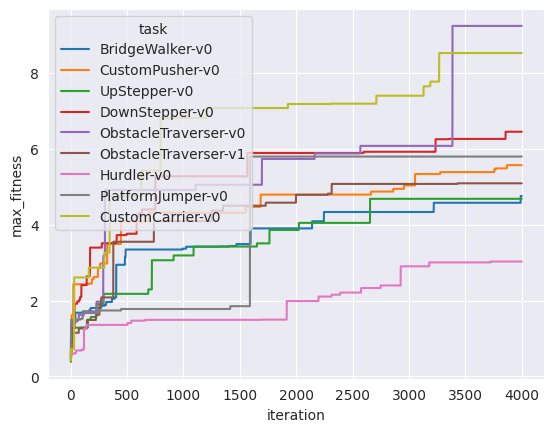

In [15]:
sns.lineplot(
    evo_df,
    x="iteration",
    y="max_fitness",
    hue="task",
)
plt.show()

In [16]:
final_evo_df = evo_df[evo_df["iteration"] == max(evo_df["iteration"])]

## Task transfer results

In [17]:
dfs = []
samplings = ["all", "s1", "s2", "s3"]
repertoires = [f"g{i + 1}" for i in range(3)]
for task in tasks:
    for sampling in samplings:
        for rep in repertoires:
            for seed in range(10):
                tmp_df = pd.read_csv(f"../results/transfer/evo-body-10x10-floor-{sampling}_{seed}_{rep}_{task}.csv")
                tmp_df["seed"] = seed
                tmp_df["task"] = task
                tmp_df["sampling"] = sampling
                tmp_df["repertoire"] = rep
                dfs.append(tmp_df)
df = pd.concat(dfs, ignore_index=True)
df = pd.concat([df, final_evo_df], ignore_index=True)
df.head()

,max_fitness,coverage1,coverage2,coverage3,seed,task,sampling,repertoire,iteration,qd_score1,qd_score2,qd_score3,time,current_time,invalid_individuals
0,4.959429,16.308594,8.398438,3.222656,0,BridgeWalker-v0,all,g1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.254878,20.898438,8.496094,3.613281,1,BridgeWalker-v0,all,g1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.565206,17.480469,8.007812,3.906250,2,BridgeWalker-v0,all,g1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.215802,15.234375,8.789062,3.613281,3,BridgeWalker-v0,all,g1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.264956,17.187500,7.714844,2.246094,4,BridgeWalker-v0,all,g1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


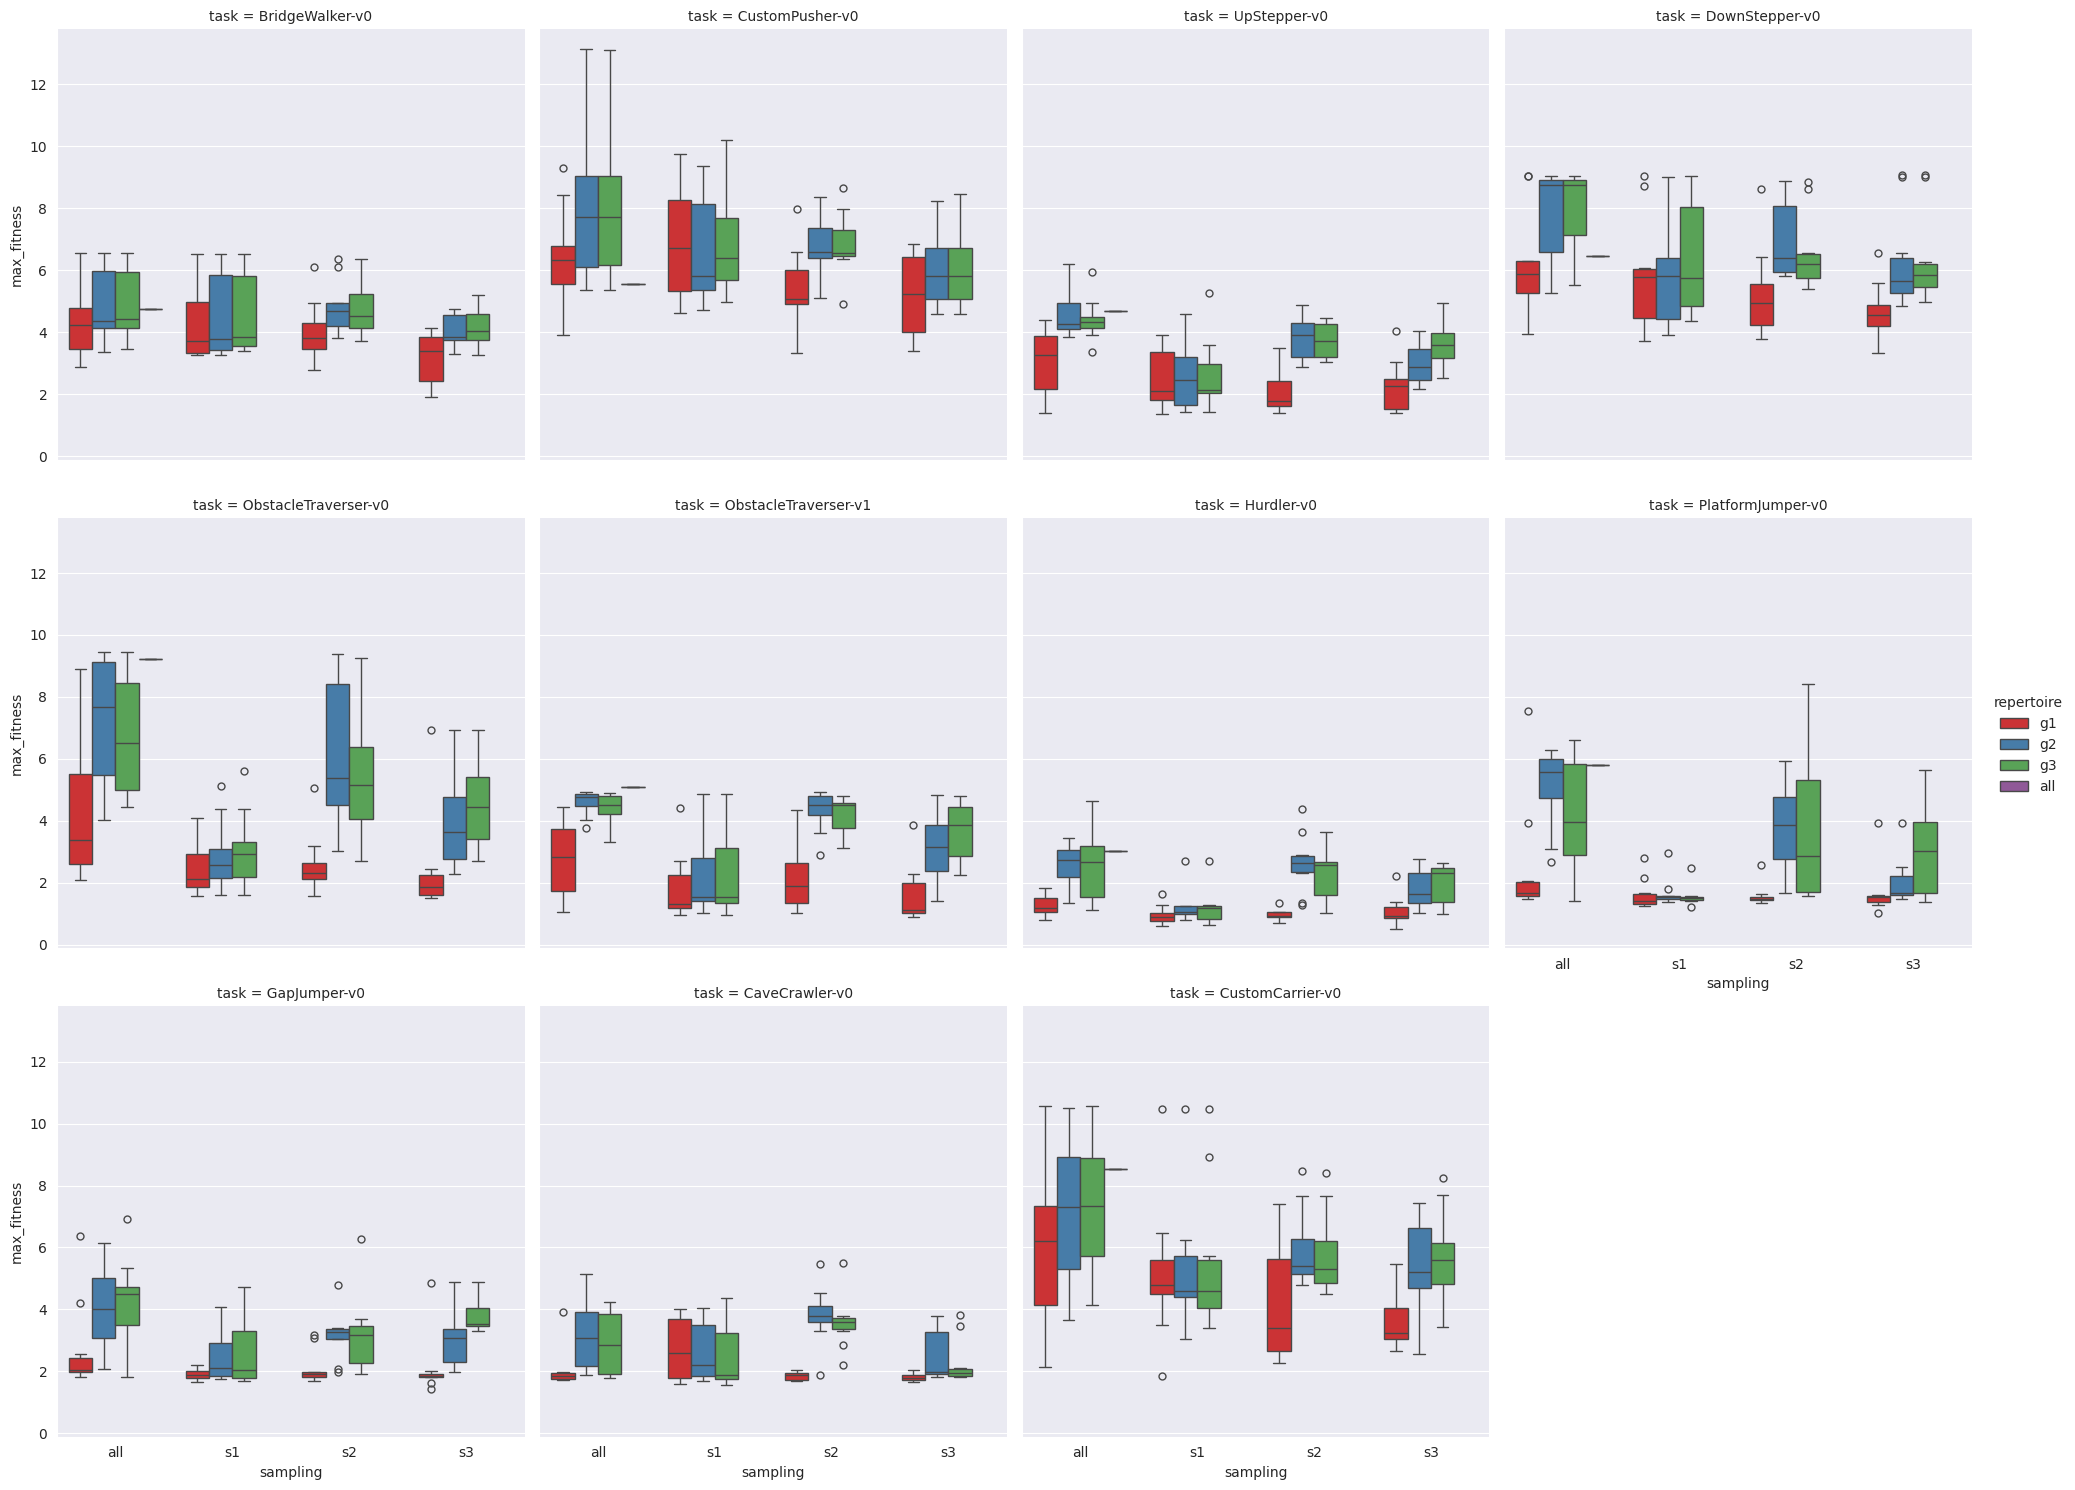

In [18]:
sns.catplot(df,
            x="sampling",
            y="max_fitness",
            col="task",
            col_wrap=4,
            hue="repertoire",
            palette="Set1",
            kind="box",
            )
plt.show()

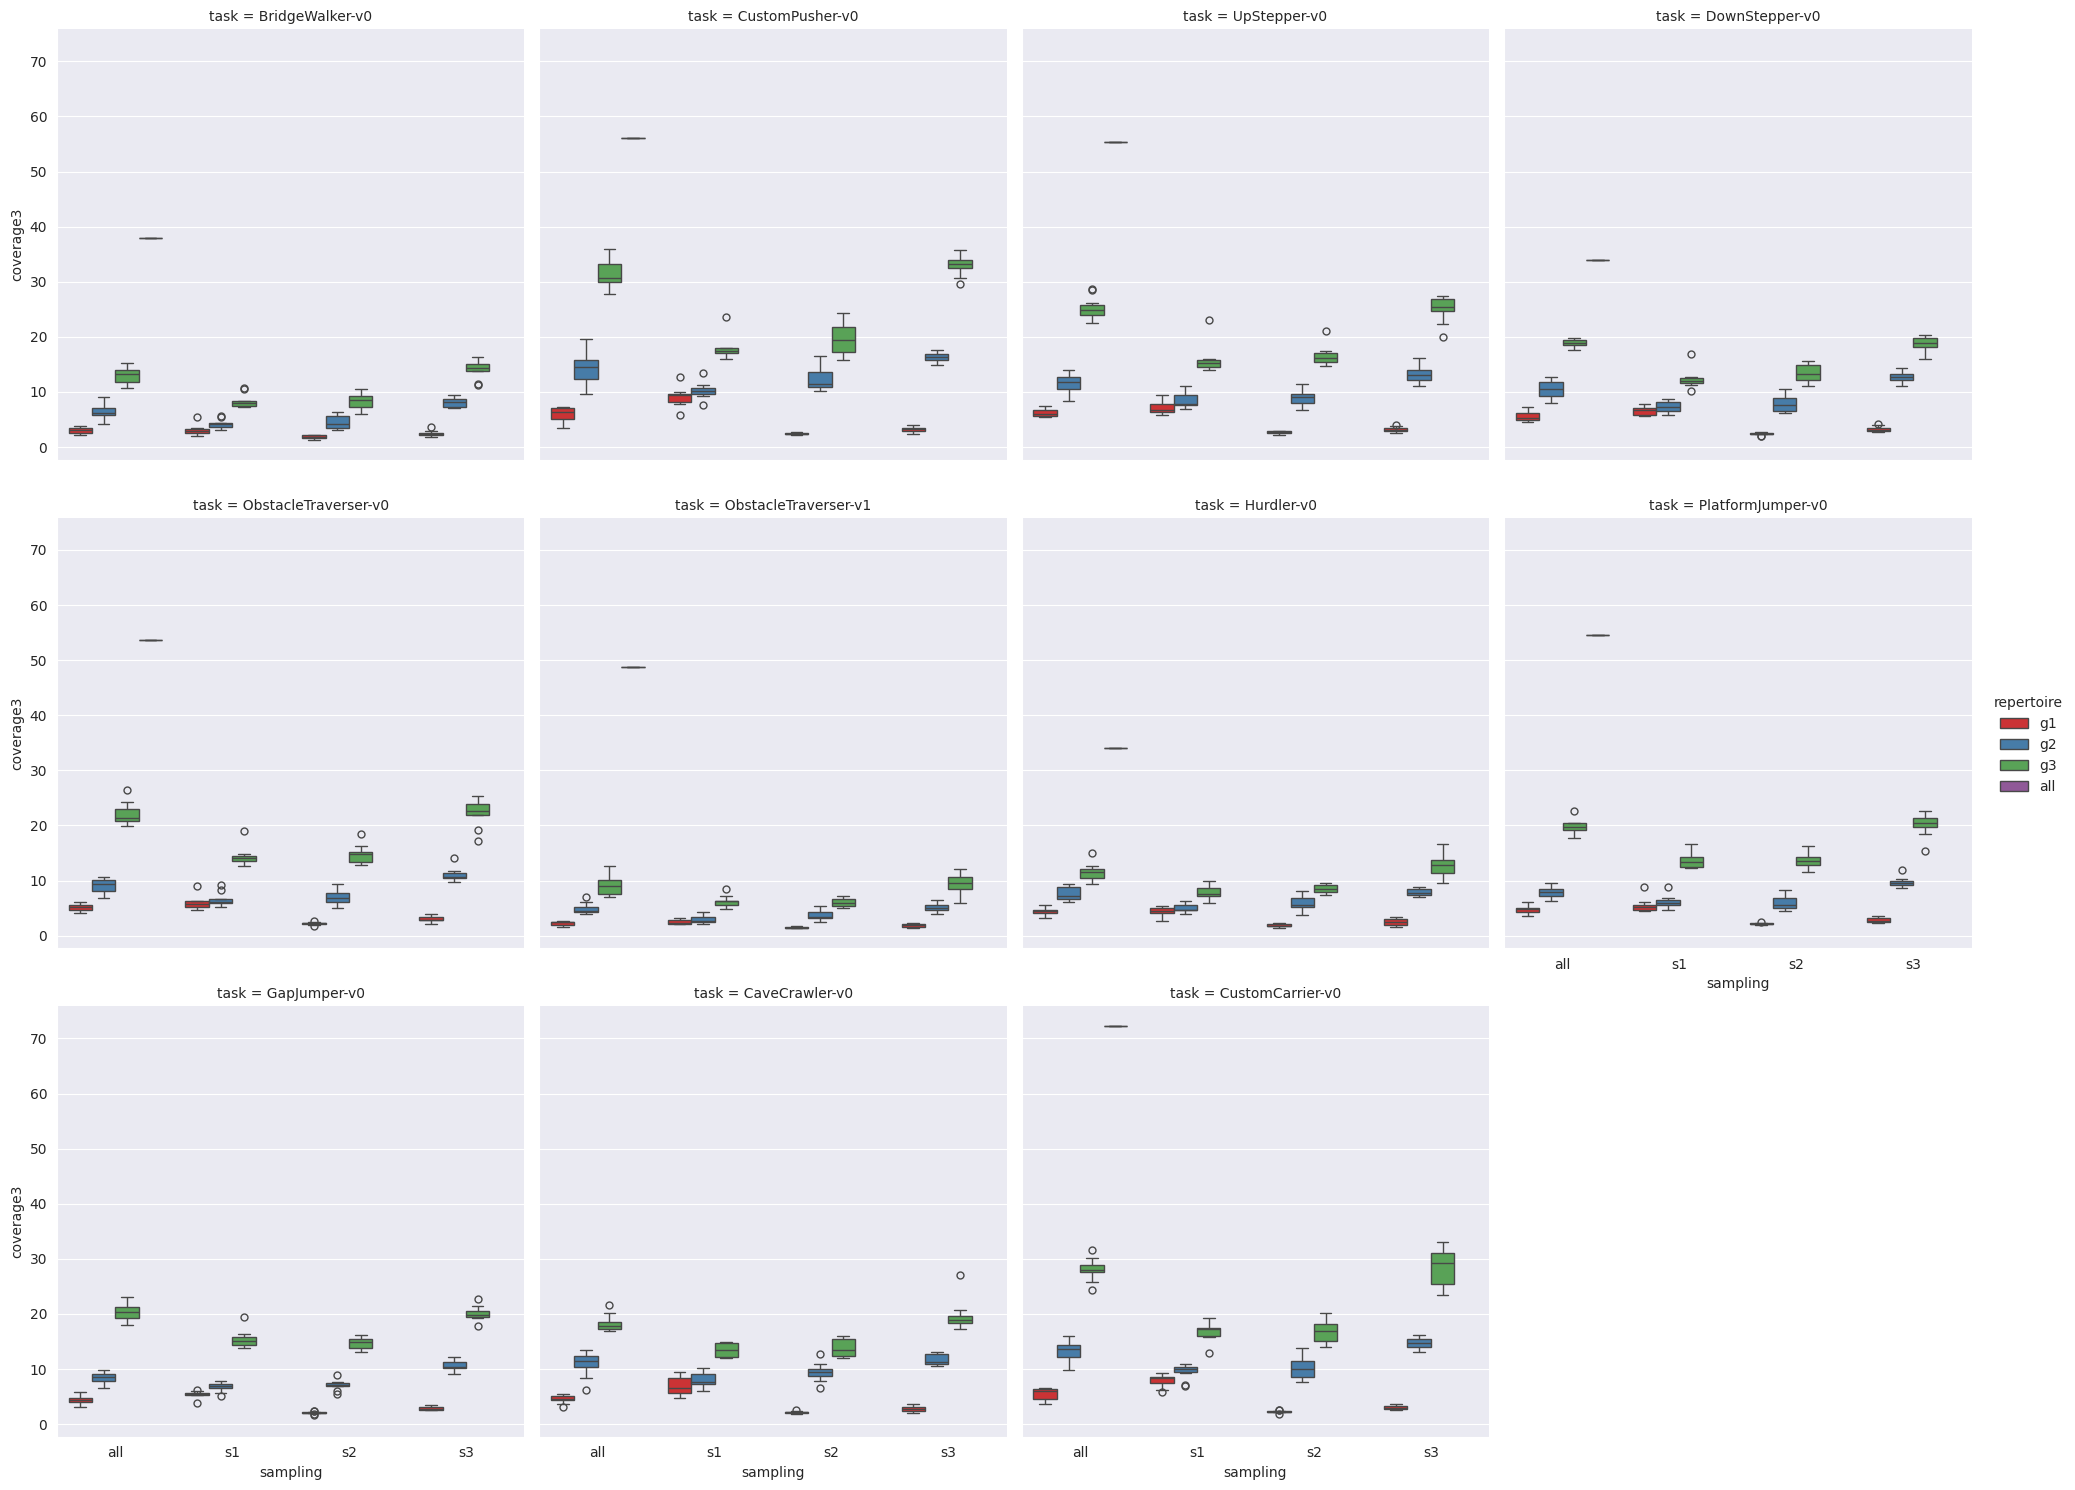

In [19]:
sns.catplot(df,
            x="sampling",
            y="coverage3",
            col="task",
            col_wrap=4,
            hue="repertoire",
            palette="Set1",
            kind="box",
            )
plt.show()